# Computer Vision Capstone

My idea for this portion of the project is to implement Simultaneous Localization and Mapping (SLAM) with a computer vision component to recognize features.

In the end I think we will have developed a SLAM framework that uses computer vision to recognize features. Then this information is all passed to the reinforcement learning framework for decision making.

https://github.com/zqyu9/LuSNAR-dataset

This repository contains a lunar segmentation, navigation and reconstruction dataset LuSNAR based on multi-sensor (Stereo Camera, LiDAR, IMU) for autonomous exploration. The LuSNAR is a multi-task, multi-scene, and multi-label lunar dataset, it includes 9 lunar simulation scenes based on Unreal Engine and each scene is divided according to topographic relief and the density of objects.

42GB of stereo image pairs <br>
50GB of depth maps <br>
356MB of semantic segmentation labels <br>
14GB of single-frame point cloud data with semantic information <br>

* it takes a long time to download.
Need to download overnight and upload to google drive


https://universe.roboflow.com/vel-tech-multi-tech/lunar-rover-123/dataset/1

Smaller dataset for object detection.

* Train set: 1105 images
* Validation set: 316 images
* Test set: 158 images

Lunar ground segmentation using a modified U-net neural network <br>
https://rdcu.be/eGUHC

Mentions using this dataset <br>
https://www.kaggle.com/datasets/romainpessia/artificial-lunar-rocky-landscape-dataset <br>
This dataset was created by Romain Pessia and Genya Ishigami of the Space Robotics Group, Keio University, Japan.

Artificially generated realistic lunar images due to the lack of real annotated images

The dataset currently contains 9,766 realistic renders of rocky lunar landscapes, and their segmented equivalents (the 3 classes are the sky, smaller rocks, and larger rocks). A table of bounding boxes for all larger rocks and processed, cleaned-up ground truth images are also provided.

**I'm going to start with this dataset**


https://github.com/qubvel-org/segmentation_models.pytorch <br>
Documentation: https://smp.readthedocs.io/en/latest/quickstart.html

**Looking at these models first**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dataset_path = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset"

if os.path.exists(dataset_path):
    print("✅ Dataset found at:", dataset_path)
else:
    print("❌ Dataset not found! Check your Drive path.")

images_path = os.path.join(dataset_path, "images")
if os.path.exists(images_path):
    print("✅ Images found at:", images_path)
else:
    print("❌ Images not found! Check your Drive path.")

✅ Dataset found at: /content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset
✅ Images found at: /content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images


In [ ]:
# going to use OpenCV
import cv2 as cv

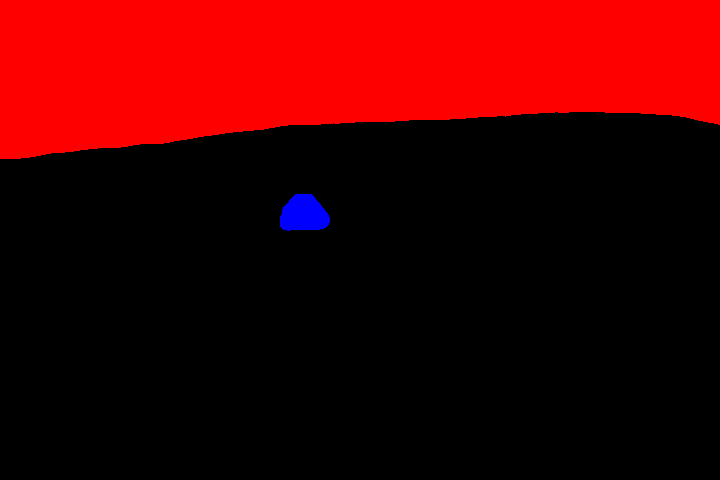

In [ ]:
from google.colab.patches import cv2_imshow
img = cv.imread(os.path.join(images_path,"clean/clean0001.png"))
cv2_imshow(img)

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

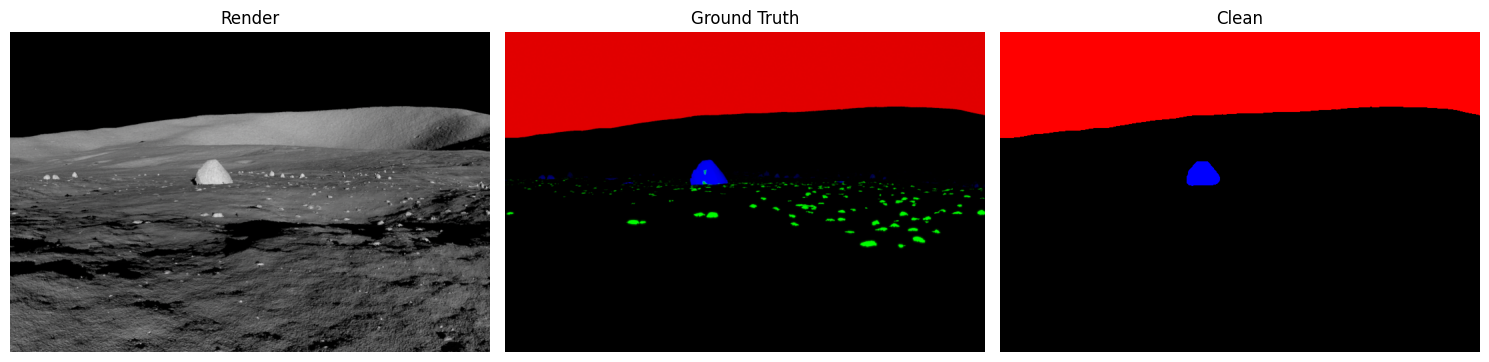

In [ ]:
# Load three images
img1 = cv.imread(os.path.join(images_path,"clean/clean0001.png"))
img2 = cv.imread(os.path.join(images_path,"ground/ground0001.png"))
img3 = cv.imread(os.path.join(images_path,"render/render0001.png"))

# Convert from BGR to RGB for correct display
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

images = [img3, img2, img1]
titles = ['Render', 'Ground Truth', 'Clean']

fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install segmentation-models-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 13.9 MB/s eta 0:00:00


In [ ]:
# import segmentation_models_pytorch as smp

# model = smp.Unet(                   # use Unet because it's good for segmentation
#     encoder_name="mobilenet_v2",    # choosing mobilenet_v2 encoder because it's more lightweight
#     encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
#     in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
#     classes=3,                      # model output channels (number of classes in your dataset)
# )

"All encoders have pretrained weights. Preparing your data the same way as during weights pre-training may give your better results (higher metric score and faster convergence). But it is relevant only for 1-2-3-channels images and not necessary in case you train the whole model, not only decoder."

In [ ]:
from segmentation_models_pytorch.encoders import get_preprocessing_fn

preprocess_input = get_preprocessing_fn('mobilenet_v2', pretrained='imagenet')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

In [ ]:
# for images, gt_masks in dataloader:

#     predicted_mask = model(images)
#     loss = loss_fn(predicted_mask, gt_masks)

#     loss.backward()
#     optimizer.step()

## To do:
* have the dataset, now need to figure out how to put in model (convert images to matrices and masks) <br>
https://pyimagesearch.com/2021/11/08/u-net-training-image-segmentation-models-in-pytorch/ <br>
https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html <br>



## things to do
1. Inspect data, ensure that all the images and masks are the same size and formatting
2. Map colors to classes
3. Create a custom dataset class in Pytorch with torch.utils.data.Dataset
4. Transform data
5. Normalize images
6. Choose a loss function
7. Build your dataloader with from torch.utils.data import DataLoader
8. Verify everything works
9. Train your model

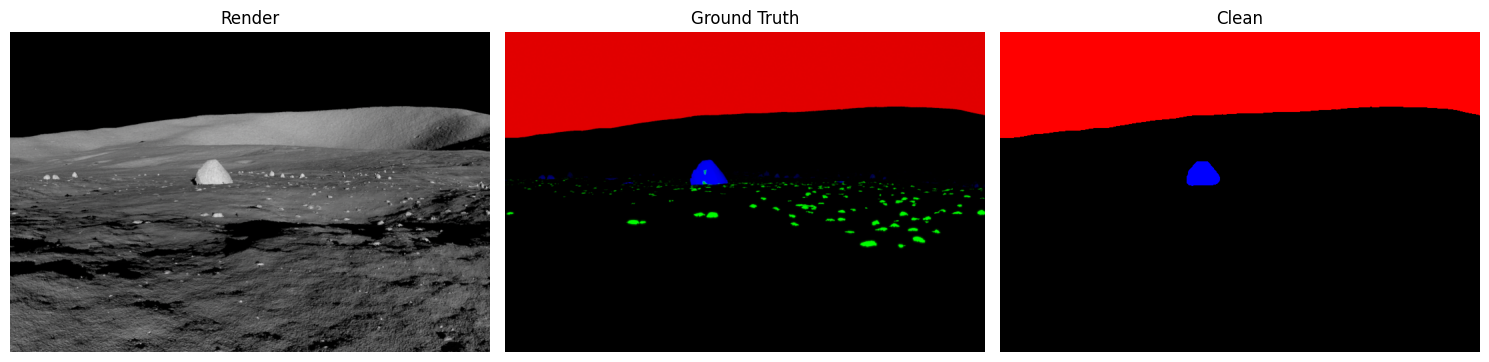

In [ ]:
# Load three images
img1 = cv.imread(os.path.join(images_path,"clean/clean0001.png"))
img2 = cv.imread(os.path.join(images_path,"ground/ground0001.png"))
img3 = cv.imread(os.path.join(images_path,"render/render0001.png"))

# Convert from BGR to RGB for correct display
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

images = [img3, img2, img1]
titles = ['Render', 'Ground Truth', 'Clean']

fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

so the ground truth and clean masks aren't actually just 4 colors. There's lots of tiny variations so i need a function that will actually take in all these weird values and change them.
I'm gonna first do the clean stuff

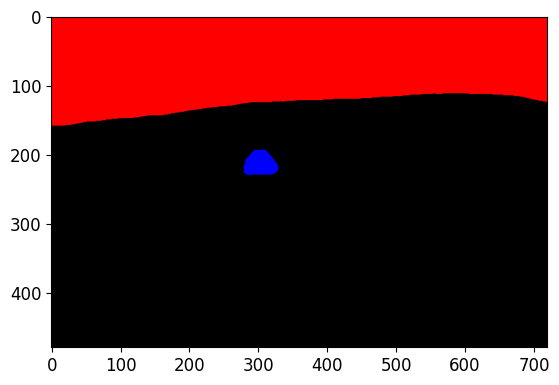

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img1)
plt.show()

In [ ]:
print(img1[200][300]) # in the blue rock
print(img1[1][1]) # in the red sky
print(img1[300][200]) # in the black ground

[  0   0 255]
[255   0   0]
[0 0 0]


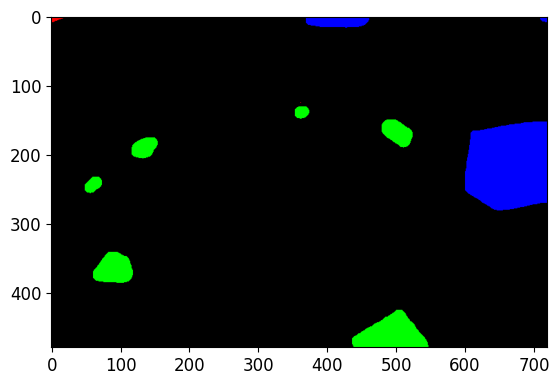

In [ ]:
img4 = cv.imread(os.path.join(images_path,"clean/clean0002.png"))
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
plt.imshow(img4)
plt.show()

In [ ]:
print(img4[470][500]) # green small rocks

[  0 255   0]


## Convert the colors to classes

In [ ]:
color2class = {
 #(R, G, B): int # color - label
  (0, 0, 0): 0, # black - ground
  (255, 0, 0): 1, # red - sky
  (0, 255, 0): 2, # green - small rock
  (0, 0, 255): 3 # blue - big rock
}

In [ ]:
def rgb2Class(mask_rgb, color2class=color2class):
  # make a new array that's the same height and width as the original photo
  # fill it with 255 so that we know if there's missing pixels that need to be imputed
  H, W, _ = mask_rgb.shape
  output = np.full((H,W), 255, np.uint8)

  # for each color in the dictionary find all the pixels that match that color and make a mask
  # for the masked pixels set it to that class
  for (r, g, b), clss in color2class.items():
    matches = (mask_rgb[...,0] == r) & (mask_rgb[...,1] == g) & (mask_rgb[...,2] == b)
    output[matches] = clss

  # return new mask
  return output

In [ ]:
# make a new folder for the clean masks
os.chdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset") # dataset_path
if not (os.path.exists("masks_clean")):
  os.mkdir("masks_clean")
os.chdir("masks_clean")

masks_clean_folder = os.getcwd()
os.getcwd()

'/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean'

In [ ]:
# get the path to the folder
clean_folder = os.path.join(dataset_path, "images/clean")

# for each image
# for clean_img in os.listdir(clean_folder):
#   clean_img_path = os.path.join(clean_folder, clean_img)

#   # read and convert to RGB
#   img = cv.imread(clean_img_path, cv.IMREAD_COLOR)
#   img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#   # convert rbg to class label
#   mask = rgb2Class(img)

#   # save the mask as "mask_clean000X.png"
#   name = "mask_" + clean_img
#   cv.imwrite(os.path.join(masks_clean_folder, name), mask)

that took 11 minutes to run lol

In [ ]:
test = cv.imread("mask_clean0001.png", cv.IMREAD_UNCHANGED)
print(test[200][300]) # in the blue rock
print(test[1][1]) # in the red sky
print(test[300][200]) # in the black ground

3
1
0


okay it worked, this is very good

## Make a custom dataset

In [ ]:
!pip install torch

In [3]:
import os, cv2 as cv, torch
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Build an augmentation pipeline:
train_aug = A.Compose([
    # Downscale (resize to smaller resolution)
    A.Resize(height=128, width=192, interpolation=cv.INTER_AREA),
    # Spatial augs:
    A.HorizontalFlip(p=0.5),
    A.RandomResizedCrop(size=(64,96), scale=(0.5, 1.0), ratio=(0.9, 1.1), p=0.8),
    # Convert to tensors
    ToTensorV2(transpose_mask=True)
])

In [5]:
from torch.utils.data import Dataset, DataLoader
import torch

class LunarDatasetAlb(Dataset):
    def __init__(self, images_dir, masks_dir, augment=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.images_list = sorted(os.listdir(images_dir))
        self.masks_list = sorted(os.listdir(masks_dir))
        self.augment = augment

    def __len__(self):
        return len(self.images_list)

    def __getitem__(self, idx):
        img = cv.imread(os.path.join(self.images_dir, self.images_list[idx]), cv.IMREAD_UNCHANGED)
        mask = cv.imread(os.path.join(self.masks_dir, self.masks_list[idx]), cv.IMREAD_UNCHANGED)

        # BGR->RGB; ensure mask is single-channel ints
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        if mask.ndim == 3:
            mask = mask[:, :, 0]

        if self.augment:
            out = self.augment(image=img, mask=mask)
            img_t = out["image"].float() / 255.0  # ToTensorV2 gives uint8 by default
            mask_t = out["mask"].long()
        else:
            img_t = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0
            mask_t = torch.from_numpy(mask).long()

        return (img_t, mask_t)

In [ ]:
# sorted(os.listdir(clean_folder))
# sorted(os.listdir(masks_clean_folder))
from torch.utils.data import Dataset, DataLoader
import torch

# create a custom dataset
class LunarDataset(Dataset):
  def __init__(self, images_dir, masks_dir, transform=None):
    # get the directory of the images and masks
    self.images_dir = images_dir
    self.masks_dir = masks_dir
    # get the list of images and masks
    self.images_list = sorted(os.listdir(images_dir))
    self.masks_list = sorted(os.listdir(masks_dir))
    # transform
    self.transform = transform

  def __len__(self):
    return len(self.images_list)

  def __getitem__(self, index):
    # get the path of item
    img_path = os.path.join(self.images_dir, self.images_list[index])
    mask_path = os.path.join(self.masks_dir, self.masks_list[index])
    # read it unchanged
    img = cv.imread(img_path, cv.IMREAD_UNCHANGED)
    mask = cv.imread(mask_path, cv.IMREAD_UNCHANGED)
    # convert to torch tensors
    img_tensor = torch.from_numpy(img).permute(2,0,1).float() / 255.0 # change [480, 720, 3] to [3, 480, 720] and float32 and normalizes
    mask_tensor = torch.from_numpy(mask).long()
    # optional transform
    if self.transform:
      img = self.transform(img)

    return (img_tensor, mask_tensor)


Now i need to split the training, validation, and test sets

currently my folder hierarchy looks something like this
```text
Artificial Lunar Dataset
├── images
│   ├── render
|   ├── clean
│   └── ground
└── masks_clean
```
I want it to look something like this
```text
Artificial Lunar Dataset
├── images
│   ├── render
|   ├── clean
|   ├── ground
|   ├── train
|   ├── validation
│   └── test
├── masks_clean
│   ├── train
│   ├── validation
│   └── test
```

## Train test split the original data

In [ ]:
os.getcwd()
os.listdir(os.path.join(os.getcwd(), "../images"))

['render', 'clean', 'ground', 'train', 'validation', 'test']

In [ ]:
# Train test split manually
def train_test_split_manual(test_size, val_size):
  import shutil

  image_source_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/render"
  mask_source_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean"

  list_of_images = sorted(os.listdir(image_source_folder))
  list_of_masks = sorted(os.listdir(mask_source_folder))

  assert(len(list_of_images) == len(list_of_masks))

  num_samples = len(list_of_images)
  test_i = round(num_samples*test_size)
  val_i = round(num_samples*test_size)

  image_train_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/train"
  os.mkdir(image_train_folder)
  image_val_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/validation"
  os.mkdir(image_val_folder)
  image_test_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/test"
  os.mkdir(image_test_folder)

  mask_train_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/train"
  os.mkdir(mask_train_folder)
  mask_val_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/validation"
  os.mkdir(mask_val_folder)
  mask_test_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/test"
  os.mkdir(mask_test_folder)

  # copy the test images first
  for i in range(test_i):
    shutil.copy(os.path.join(image_source_folder, list_of_images[i]), os.path.join(image_test_folder, list_of_images[i]))
    shutil.copy(os.path.join(mask_source_folder, list_of_masks[i]), os.path.join(mask_test_folder, list_of_images[i]))

  for i in range(test_i, test_i+val_i):
    shutil.copy(os.path.join(image_source_folder, list_of_images[i]), os.path.join(image_val_folder, list_of_images[i]))
    shutil.copy(os.path.join(mask_source_folder, list_of_masks[i]), os.path.join(mask_val_folder, list_of_images[i]))

  for i in range(test_i+val_i, num_samples):
    shutil.copy(os.path.join(image_source_folder, list_of_images[i]), os.path.join(image_train_folder, list_of_images[i]))
    shutil.copy(os.path.join(mask_source_folder, list_of_masks[i]), os.path.join(mask_train_folder, list_of_images[i]))


In [ ]:
#train_test_split_manual(0.2,0.2)

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/train")))
print(len(os.listdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/validation")))
print(len(os.listdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/test")))
print(len(os.listdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/train")))
print(len(os.listdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/validation")))
print(len(os.listdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/test")))

5860
1953
1953
5860
1953
1953


## Training?

Now I can finally load my custom dataset

In [ ]:
image_train_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/train"
image_val_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/validation"
image_test_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/images/test"

mask_train_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/train"
mask_val_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/validation"
mask_test_folder = "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/masks_clean/test"

In [ ]:
training_set = LunarDataset(image_train_folder, mask_train_folder, transform = None)
validation_set = LunarDataset(image_val_folder, mask_val_folder, transform = None)

In [ ]:
from torch.utils.data import DataLoader
training_dataloader = DataLoader(training_set, batch_size = 8, shuffle = True)
validation_dataloader = DataLoader(validation_set, batch_size = 8, shuffle = True)

In [ ]:
import torch
import torch.nn as nn
import segmentation_models_pytorch as smp

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = smp.Unet(                   # use Unet because it's good for segmentation
    encoder_name="mobilenet_v2",    # choosing mobilenet_v2 encoder because it's more lightweight
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=4,                      # model output channels (number of classes in your dataset)
).to(device)

# Use cross entropy loss for the loss function
loss_fn = nn.CrossEntropyLoss(ignore_index=255)
loss_fn = loss_fn.to(device)
# Optimizer - use Adam
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Adjusts learning rate
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

model.safetensors:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

In [ ]:
batch_size = 8

# directly from the pytorch documentation
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):

        # move images and masks to gpu
        X = X.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            # move images and masks to gpu
            X = X.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# adapted from pytorch documentation
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_dataloader, model, loss_fn, optimizer)
    test_loop(validation_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.496998  [    8/ 5860]
loss: 0.153232  [  808/ 5860]
loss: 0.111099  [ 1608/ 5860]
loss: 0.093974  [ 2408/ 5860]
loss: 0.218032  [ 3208/ 5860]
loss: 0.052639  [ 4008/ 5860]
loss: 0.072152  [ 4808/ 5860]
loss: 0.157384  [ 5608/ 5860]
Test Error: 
 Accuracy: 33483535.3%, Avg loss: 0.111639 

Epoch 2
-------------------------------
loss: 0.123672  [    8/ 5860]
loss: 0.149070  [  808/ 5860]
loss: 0.052121  [ 1608/ 5860]
loss: 0.167490  [ 2408/ 5860]
loss: 0.117155  [ 3208/ 5860]
loss: 0.222676  [ 4008/ 5860]
loss: 0.226413  [ 4808/ 5860]
loss: 0.304248  [ 5608/ 5860]
Test Error: 
 Accuracy: 33337566.2%, Avg loss: 0.123786 

Epoch 3
-------------------------------
loss: 0.053243  [    8/ 5860]
loss: 0.136701  [  808/ 5860]
loss: 0.095550  [ 1608/ 5860]
loss: 0.056980  [ 2408/ 5860]
loss: 0.122642  [ 3208/ 5860]
loss: 0.167299  [ 4008/ 5860]
loss: 0.102099  [ 4808/ 5860]
loss: 0.205910  [ 5608/ 5860]
Test Error: 
 Accuracy: 33654350.0%, Avg los

In [ ]:
os.mkdir("/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/model")
torch.save(model.state_dict(), "/content/drive/MyDrive/artificial-lunar-rocky-landscape-dataset/model/unet_lunar_segmentation.pth")